In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [5]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
train_set=df.iloc[:,1:2].values

print(train_set)
print(train_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [7]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(train_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
#Create X,Y data structure
X_train = []
y_train = []

In [9]:
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [10]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [11]:
#Reshape the Data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

X_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

ModuleNotFoundError: No module named 'keras'

In [36]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True)) 
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50)) 
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [37]:
regressor.compile(optimizer = 'Adam',loss = 'mean_squared_error')
regressor.fit(X_train,y_train, epochs=20, batch_size = 32)


Epoch 1/20

38/38 [==============================] - 28s 156ms/step - loss: 0.0319
Epoch 2/20
38/38 [==============================] - 6s 161ms/step - loss: 0.0061
Epoch 3/20
38/38 [==============================] - 6s 159ms/step - loss: 0.0060
Epoch 4/20
38/38 [==============================] - 7s 177ms/step - loss: 0.0048
Epoch 5/20
38/38 [==============================] - 6s 169ms/step - loss: 0.0048
Epoch 6/20
38/38 [==============================] - 6s 154ms/step - loss: 0.0048
Epoch 7/20
38/38 [==============================] - 6s 148ms/step - loss: 0.0061
Epoch 8/20
38/38 [==============================] - 6s 148ms/step - loss: 0.0043
Epoch 9/20
38/38 [==============================] - 6s 148ms/step - loss: 0.0045
Epoch 10/20
38/38 [==============================] - 6s 149ms/step - loss: 0.0039
Epoch 11/20
38/38 [==============================] - 6s 151ms/step - loss: 0.0042
Epoch 12/20
38/38 [==============================] - 6s 150ms/step - loss: 0.0040
Epoch 13/20
38/38 [===

In [39]:
dataset_test = pd.read_csv('C:/Users/VINEET/Desktop/Google_Stock_Price_test.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

In [42]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs [i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


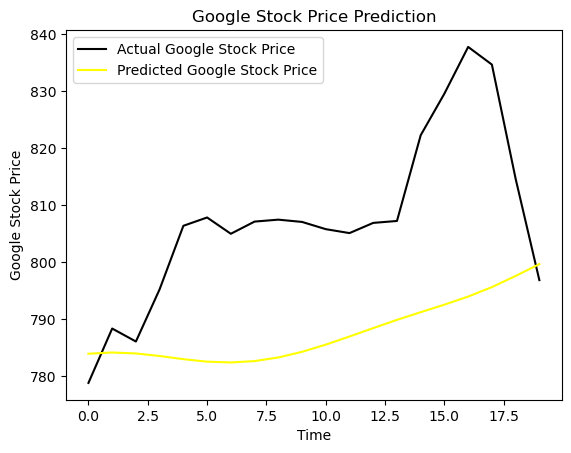

In [44]:
plt.plot(actual_stock_price, color = 'black', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'yellow', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()